<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/14_clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Download and Preprocessing

In [ ]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2025-02-07 15:55:30--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.135.138, 74.125.135.113, 74.125.135.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2025-02-07 15:55:30--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./E-commerce.csv')
df.head()


,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
X=df.drop("ID",axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

### KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=18)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 3, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.27878248, 0.31911045, 0.0986392 , 0.05687348, 0.39031846,
        0.33676453],
       [0.45659753, 0.47266687, 0.20419309, 0.43959913, 0.55365351,
        0.37599574],
       [0.43649   , 0.45510571, 0.21579979, 0.46642479, 0.2306353 ,
        0.2970201 ],
       [0.16972077, 0.2333873 , 0.49519562, 0.03295739, 0.38546526,
        0.36577318]])

### Qualitative Evaluation

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components_pca = pca.fit_transform(X)


In [ ]:

clusters = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters['label'] = kmeans.labels_
clusters.head(3)


,X1,X2,label
0,-0.231264,0.070279,0
1,-0.112674,0.036360,0
2,0.186760,0.112458,1


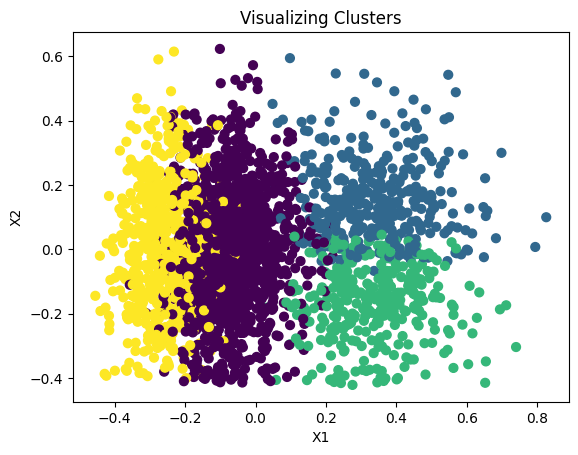

In [ ]:
def viz_clusters(clusters):
    plt.scatter(clusters['X1'], clusters['X2'], c=clusters['label'], s = 40)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Visualizing Clusters')

viz_clusters(clusters)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(2)

components_tsne = tsne.fit_transform(X)


In [ ]:
clusters_tsne = pd.DataFrame(components_tsne, columns=['X1', 'X2'])
clusters_tsne['label'] = kmeans.labels_
clusters_tsne.head(3)


,X1,X2,label
0,-14.752929,11.289070,0
1,-15.956740,-4.870303,0
2,32.543354,4.684096,1


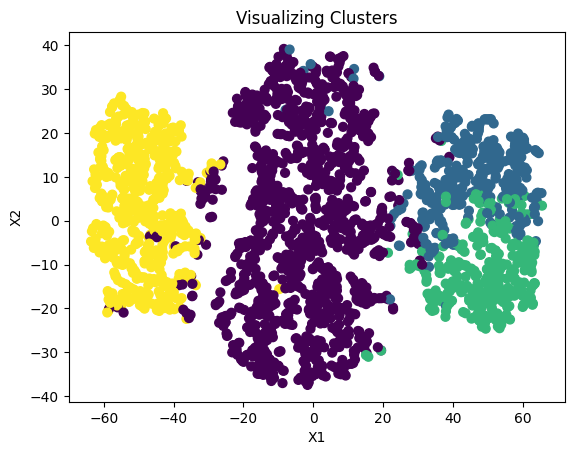

In [ ]:
viz_clusters(clusters_tsne)

In [ ]:
clusters_df = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters_df['label'] = kmeans.labels_
clusters_df.head(3)


,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,0
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


### Cluster Analysis

In [ ]:
polar = clusters_df.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar.head(4)


,label,variable,value
0,0,n_clicks,0.278782
1,1,n_clicks,0.456598
2,2,n_clicks,0.436490
3,3,n_clicks,0.169721


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()


### Elbow Method

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]


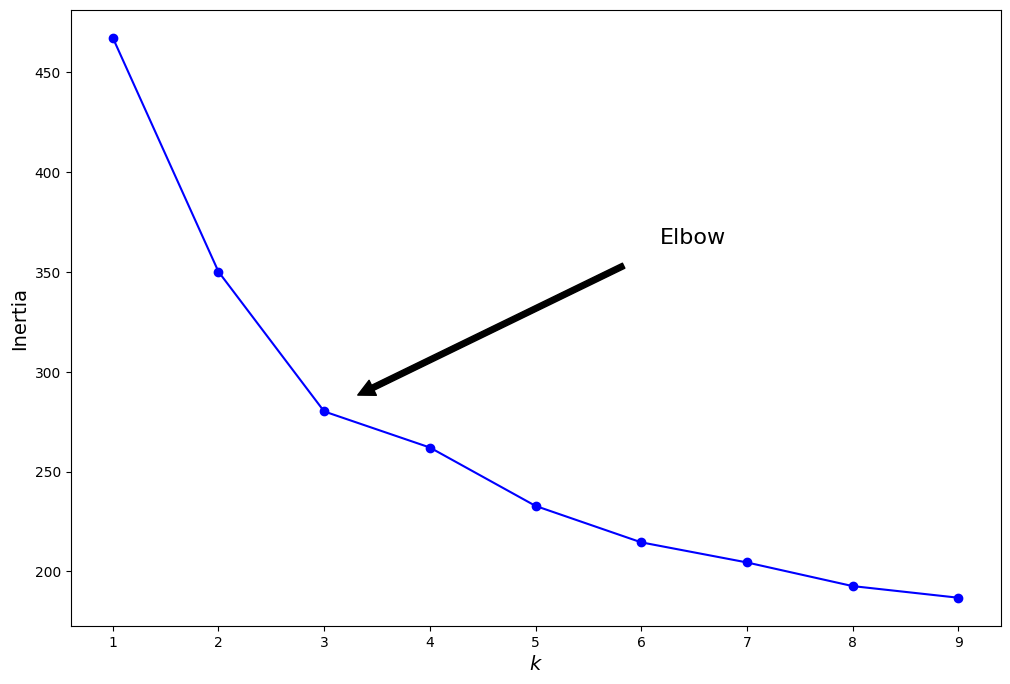

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [ ]:
## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)


0.24019904847942408

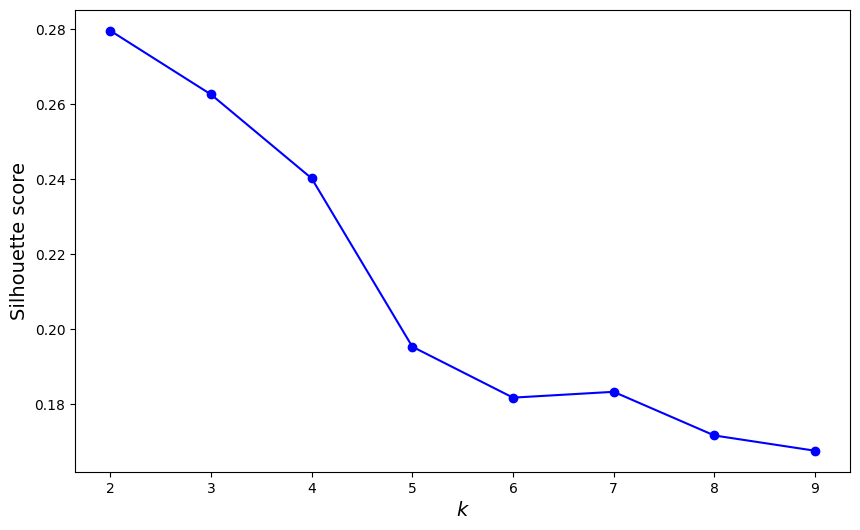

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()


### Scratch Implementation of KMeans

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Function to initialize centroids
def initialize_centroids(X, K):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids


In [ ]:
# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters


In [ ]:
# Function to update centroids
def update_centroids(X, clusters, K):
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
    return new_centroids


In [ ]:
# K-Means algorithm
def k_means(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, clusters


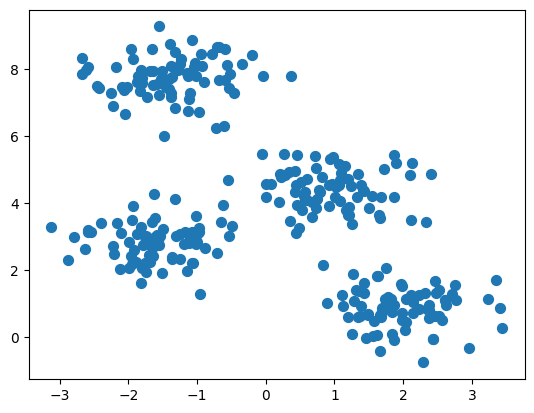

In [ ]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()


In [ ]:
# Now we apply our K-Means algorithm to the generated data.
K = 4
centroids, clusters = k_means(X, K)


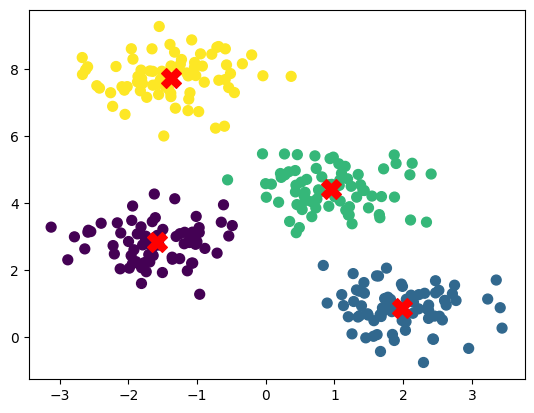

In [ ]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.show()
